# Curve-Fitting

Preliminaries : We are given a set of measured data. \\
## Introduction on Curve Fitting :
Finding a mathematical function in an analytic form that best fit the data. \\

### Exact-Fit
We assume that given sample does not have measurement errors. Want to learn a curve that passes through each points. \\

### Best-Fit
Whenever we are measuring some data, there will be errors associated with it.

> Simpliest best fit method is **Linear Regression.**
parametric function for this is y = a*x + b , where a = slope and b = intercept.


> Polynomial regression is also there. We want to fit a ploynomial of a specific order d to our data. For example: Gaussian functions, Trigonometric functions, Sigmoid functions.

Various methods of estimation can be used to determine the estimates of the parameters. Among them least squares and maximum likelihood principles are popular methods of estimation.

### Least - square algorithm
Suppose, $(x_i, y_i)$ are our given data points. We want to fit a curve $f(x_i, a_n)$ to the data points. \\

 $a_n$ = n number of parameters of our model. \\



For some given $x_i$'s, we want to find the set of parameters for which **f** will be a good fit. This algorithm tries to minimize the sum of squares of the residuals (difference between observed and predicted values), $S(a_1, a_2, ...a_n)$. \\


$S(a_1, a_2, ...a_n) = ∑(y_i - f(x_i, a_1, a_2, ...a_n))^2$ \\


The parameters are estimated by minimizing E using the following relation \\

$\frac{\partial S(a_1, a_2, ...a_n)}{∂ a_m} = 0 ⇒ -2∑(y_i - f(x_i, a_1, a_2, ...a_n)) \frac{∂ f(x_i, a_1, a_2, ...a_n)}{∂ a_m} = 0$ \\

* If N number of parameters are there then we will get N equations from $\frac{\partial S(a_1, a_2, ...a_n)}{∂ a_m} = 0$. After solving them optimal values for the parameters will be estimated.
* For an eaxmple, consider linear model, f(a, b) = a*x + b. Then minimizing S(a, b) will give me following two equations \\

$\frac{\partial S(a, b)}{∂ a} = 0 ⇒ -2∑(y_i - f(x_i, a, b)) x_i = 0$ \\
$\frac{\partial S(a, b)}{∂ b} = 0 ⇒ -2∑(y_i - f(x_i, a, b)) = 0$

a and b are two unknowns in the above equations and after solving them we will get the value for a and b.

### Maximum Likelihood
Suppose, our model is $f(x_i, a_n)$. Then for each data point we can write $y_i = f(x_i, a_1, a_2, ...a_n) + ϵ_i$ \\
$ϵ_i$ is error term. It may appear for several reasons. (e.g., the effect of all deleted variables in the model, inherit randomness in the observation etc.).
We assume that $ϵ_i$ are normally distributed $N(0, \sigma^2)$.

The likelihood function of the given observations $(x_i, y_i)$ and unknown parameters $a_1, a_2, ...a_n$ and $σ^2$ is \\

$L(x_i, y_i; a_1, a_2, ...a_n, \sigma^2) = \Pi \sqrt{\frac{1}{2\pi \sigma^2}} exp[-\frac{(y_i - f(x_i, a_1, a_2, ...a_n))^2}{2 \sigma^2}]$

If we maximize the above likelihood function then there will be (n+1) equations for (n+1) parameters $(a_1, a_2, ...a_n, \sigma)$. Solving (n+1) sets of equations will give us the estimates for the parameters.


### Use of Scipy in curve-fitting (scipy.optimize.curve_fit)
Uses non-linear least-square to fit a function.

#### Syntax
scipy.optimize.curve_fit(f, xdata, ydata, p0)

Inputs: \\
            
            f: function we want to fit to the data. Model function.
      
            xdata: array_like
                   Independent variable where the data is measured.
                  
            ydata: array_like
                   Dependent data.

            p0: array_like, optional
                Initial-values for the parameters of your chosen model. \\
                If no guess is provided then initial-values for each parameters will be considered as 1.

Returns: \\

        popt: array
              Optimal values for the parameters. So that E can be minimized.

        pcov: 2-D array








In [1]:
## Random example from the internet
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import h5py
import pandas as pd

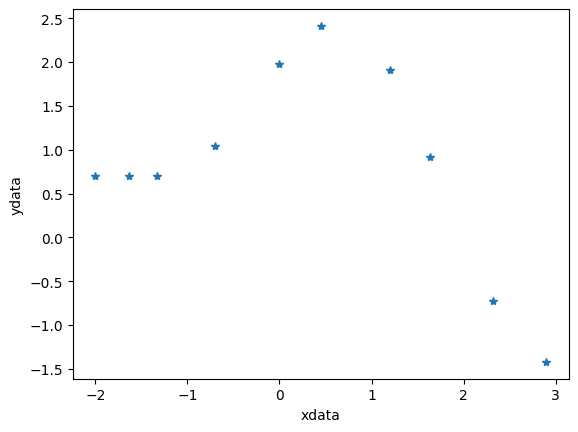

In [ ]:
# Given-data
xdata = np.array([-2,-1.64,-1.33,-0.7,0,0.45,1.2,1.64,2.32,2.9])
ydata = np.array([0.699369,0.700462,0.695354,1.03905,1.97389,2.41143,1.91091,0.919576,-0.730975,-1.42001])

# Show data points
plt.plot(xdata,ydata,'*')
plt.xlabel('xdata')
plt.ylabel('ydata')
plt.show()

Our model is  $f(x, p1, p2, p3, p4) = p1*\cos(p2 * x) + p3*\sin(p4*x)$. \\

We want to find optimal values of $p1, p2, p3, p4$ that fit the above data.

In [ ]:
# Model:
def func(x, p1,p2,p3,p4):
  return p1*np.cos(p2*x) + p3*np.sin(p4*x)

In [ ]:
popt, pcov = curve_fit(func, xdata, ydata, p0=(1.0,0.2,1.0,1.0))

print("Parameter estimation results:")
print("p1 = ",popt[0]," | p2 = ",popt[1], " | p3 = ",popt[2], " | p4 = ",popt[3])
print("Covariance matrix of the estimate:")
print(pcov)

Parameter estimation results:
p1 =  1.9609385623871984  | p2 =  0.6947976213840288  | p3 =  0.7253401367295284  | p4 =  1.8276363732974348
Covariance matrix of the estimate:
[[ 7.25756745e-05  4.99014686e-06 -1.53721107e-05  4.89129788e-06]
 [ 4.99014686e-06  4.21460946e-06 -6.62226233e-06  4.18519284e-06]
 [-1.53721107e-05 -6.62226233e-06  7.40977498e-05 -1.37349928e-06]
 [ 4.89129788e-06  4.18519284e-06 -1.37349928e-06  4.18833629e-05]]


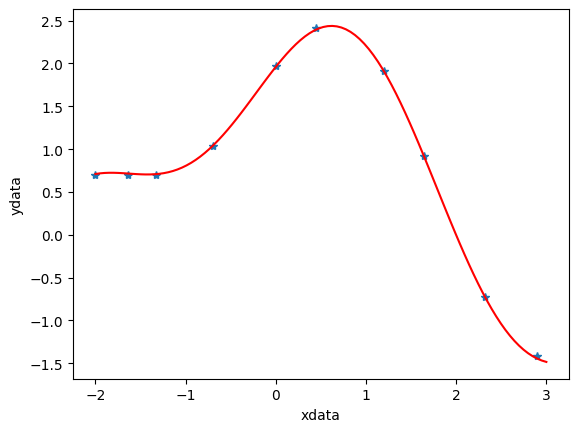

In [ ]:
# Plot of fitted curve along with the data
curvex=np.linspace(-2,3,100)
curvey=func(curvex,popt[0],popt[1],popt[2],popt[3])
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')
plt.xlabel('xdata')
plt.ylabel('ydata')
plt.show()

### Covariance Matrix

One of the outputs of the function is covariance matrix which is given by

\begin{pmatrix}
var(a) & cov(b,a)\\
cov(a,b) & var(b)
\end{pmatrix}

These elements can be calculated as

$ var(a) = \frac{Σ_{i = 1}^N (a-μ_a)^2}{N} $ \\
$ var(b) = \frac{Σ_{i = 1}^N (b-μ_b)^2}{N} $ \\

where $\mu_i$ is the mean. \\
$ cov(b,a) = \frac{Σ_{i = 1}^N (a-μ_a)(b-μ_b)}{N-1} $ \\
$ cov(a,b) = \frac{Σ_{i = 1}^N (a-μ_a)(b-μ_b)}{N} $

If we square the diagonal elements we can obtain the error for the corresponding parameters.





In [ ]:
print(pcov)

[[ 7.25756745e-05  4.99014686e-06 -1.53721107e-05  4.89129788e-06]
 [ 4.99014686e-06  4.21460946e-06 -6.62226233e-06  4.18519284e-06]
 [-1.53721107e-05 -6.62226233e-06  7.40977498e-05 -1.37349928e-06]
 [ 4.89129788e-06  4.18519284e-06 -1.37349928e-06  4.18833629e-05]]


In [ ]:
errors = (np.diag(pcov))**2
print('error for p1:', errors[0])
print('error for p2:', errors[1])
print('error for p3:', errors[2])
print('error for p4:', errors[3])

error for p1: 5.267228525656997e-09
error for p2: 1.7762932936848058e-11
error for p3: 5.490476530223807e-09
error for p4: 1.7542160883637924e-09


In [ ]:
# Model:
def func_new_parameter(x, p1,p2,p3,p4, p5):
  return p1*np.cos(p2*x) + p3*np.sin(p4*x) + (0.0000001)*(p5)*x**3

In [ ]:
popt_np, pcov_np = curve_fit(func_new_parameter, xdata, ydata,p0=(1.0,0.2,1.0,1.0,0.5))

In [ ]:
print(pcov_np)

[[ 8.91751137e-06  1.10617626e-06 -2.34782477e-07  1.47629940e-06
   3.24547097e+00]
 [ 1.10617626e-06  6.72836335e-07 -1.23235986e-07  8.18281825e-07
   1.31785876e+00]
 [-2.34782477e-07 -1.23235986e-07  8.75097373e-06  6.92666350e-07
   2.89949815e+00]
 [ 1.47629940e-06  8.18281825e-07  6.92666350e-07  4.79268962e-06
   2.06222812e+00]
 [ 3.24547097e+00  1.31785876e+00  2.89949815e+00  2.06222812e+00
   7.05420883e+06]]


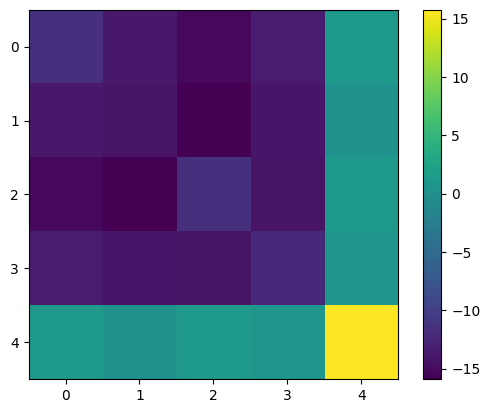

In [ ]:
plt.imshow(np.log(np.abs(pcov_np)))
plt.colorbar()
plt.show()

### Initial Parameter Selection
Selecting parameters is a crutial aspect of the line fitting. In general function that is fitted is known by physical constraints. Initial parameters should be determined considering extramum points and general properties of the function.

- 1st example: We do not know what kind of function that we need to fit.
- 2nd example: We do what kind of function that we need to fit.

This is the count rate of photons emmited by Cs-137 atom. From physical constraints we know that peak is going to behave like a Gaussian curve as follows \\

$ f = Ae^{-(x-\mu)^2/σ^2}$

In this equation $\mu$ represents the energy of the photon and $σ$ represents the resolution of the detector.

In [3]:
df = pd.read_csv('./curvefite1.csv')
x_stuff = df.Channel
y_stuff = df.Cs137

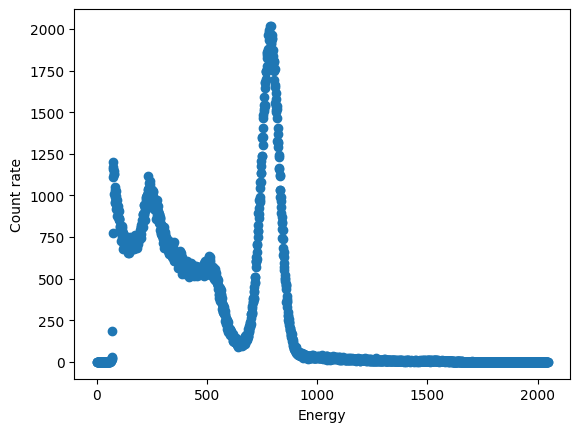

In [14]:
plt.scatter(x_stuff, y_stuff)
plt.xlabel('Energy')
plt.ylabel('Count rate')
plt.show()

In [5]:
def gauss_f(x,A,mu,sig):
    return A*np.exp(-(x-mu)**2/sig**2)

In [6]:
x_data = x_stuff[(x_stuff>725) & (x_stuff<850)]
y_data = y_stuff[(x_stuff>725) & (x_stuff<850)]

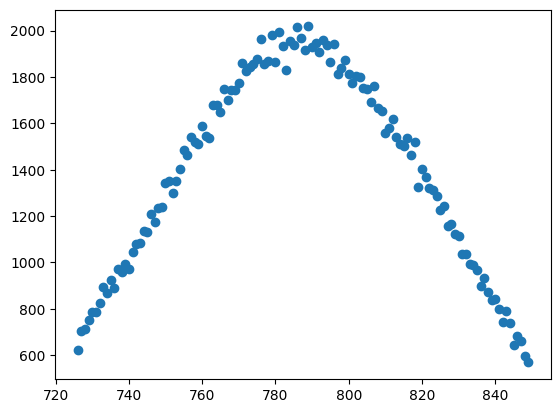

In [7]:
plt.scatter(x_data, y_data)
plt.show()

In [8]:
popt, pcov = curve_fit(gauss_f, x_data, y_data, p0=[2000, 790, 60])

In [9]:
popt

array([1939.55510386,  786.33851861,   57.78717218])

In [10]:
np.sqrt(np.diag(pcov))

array([5.70257763, 0.14401935, 0.26427165])

In [11]:
A_opt, mu_opt, sig_opt = popt
x_model = np.linspace(min(x_data), max(x_data), 1000)
y_model = gauss_f(x_model, A_opt, mu_opt, sig_opt)

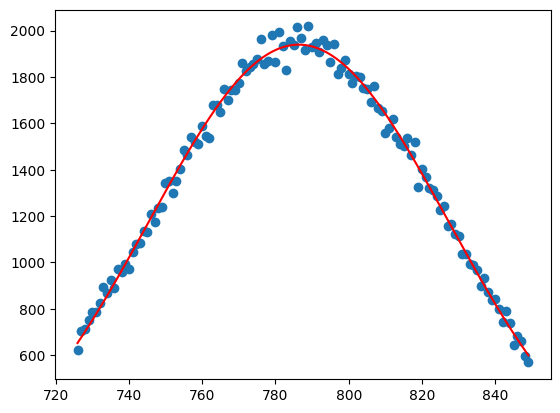

In [12]:
plt.scatter(x_data, y_data)
plt.plot(x_model, y_model, color='r')
plt.show()